In [30]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import seaborn as sns


# Airline Data Collection: Customer-Written Reviews

## Scrape Reviews

In [2]:
pages = 25
page_size=100


In [3]:
def extract_star_ratings(review, category):
  try:
    stars = review.find('td', class_=f'review-rating-header {category}').find_next_sibling('td').find_all('span', class_='star fill')
    return len(stars)
  except AttributeError:
    return None

In [4]:
titles = []
authors = []
dates = []
countries = []
travel_types = []
dates_flown = []
routes = []
reviews = []
seat_types = []
recommended = []
seat_comforts = []
cabin_services = []
food_beverages = []
inflight_entertainments = []
ground_services = []
value_moneys = []
stars = []

Fields we want to grab from each review:
* author
* date published
* country
* type of traveller
* route
* review body
* seat type
* recommended (yes/no)
* seat comfort (/5)
* cabin staff service(/5)
* food and beverage (/5)
* inflight entertainment (/5)
* ground staff services
* value for money (/5)
* rating value (/5)


In [5]:
# for each page get reviews, dates, country, seat type, etc.
for i in range(1, pages+1):
  response = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
  soup = BeautifulSoup(response.content, "html.parser")

  full_review = soup.find_all('article', itemprop='review')

  for review in full_review:
    # titles
    title = review.find('h2', class_='text_header')
    titles.append(title.text.strip() if title else "N/A")


    
  # author
  for item in soup.find_all('span', itemprop='name'):
    authors.append(item.text.strip())

  # date published
  for item in soup.find_all('time'):
    dates.append(item.text)
  
  # country
  for item in soup.find_all('h3'):
    countries.append(re.search(r'\((.*?)\)',item.text.strip()))

  # travel type
  for tr in soup.find_all('tr'):
    td = tr.find('td', class_='review-rating-header type_of_traveller')
    if td and td.text.strip() == 'Type Of Traveller':
      travel = td.find_next_sibling('td', class_='review-value')
      travel_types.append(travel.text.strip())


  # date flown
  for item in soup.find_all('td', class_='review-rating-header date_flown'):
    date_flown = item.find_next_sibling('td').text.strip()
    dates_flown.append(date_flown)

  # route
  for item in soup.find_all('td', class_='review-rating-header route'):
    routes.append(item.find_next_sibling('td').text.strip())
  
  # review body
  for item in soup.find_all('div', class_='text_content'): 
    reviews.append(item.text)

  # seat type
  for item in soup.find_all('td', class_='review-rating-header cabin_flown'):
    seat_types.append(item.find_next_sibling('td').text.strip())

  # recommended
  for item in soup.find_all('td', class_='review-rating-header recommended'):
    recommended.append(item.find_next_sibling('td').text.strip())
    
  # seat comfort
  for item in soup.find_all('td', class_='review-rating-header seat_comfort'):
    comfort = extract_star_ratings(item, 'seat_comfort')
    seat_comforts.append(comfort)
  
  # cabin staff service
  for item in soup.find_all('td', class_='review-rating-header cabin_staff_service'):
    staff_service = extract_star_ratings(item, 'cabin_staff_service')
    cabin_services.append(staff_service)
    
  # food & beverages
  for item in soup.find_all('td', class_='review-rating-header food_and_beverages'):
    fb = extract_star_ratings(item, 'food_and_beverages')
    food_beverages.append(fb)

  # inflight entertainment
  for item in soup.find_all('td', class_='review-rating-header inflight_entertainment'):
    entertainment = extract_star_ratings(item, 'inflight_entertainment')
    inflight_entertainments.append(entertainment)

  # ground service
  for item in soup.find_all('td', class_='review-rating-header ground_service'):
    service = extract_star_ratings(item, 'ground_service')
    ground_services.append(service)

  # value for money
  for item in soup.find_all('td', class_='review-rating-header value_for_money'):
    value_moneys.append(extract_star_ratings(item, 'value_for_money'))

  # rating value
  for item in soup.find_all('div', class_='rating-10'):
    if item.span:
      star_rating = stars.append(item.span.text.strip())
    else:
      stars.append("None")


In [6]:
if not reviews:
    print("No reviews found")
else:
    print(f"Found {len(reviews)} reviews")

Found 2500 reviews


In [7]:
if len(dates) == len(countries) == len(travel_types) == len(routes) == len(reviews) == len(seat_types) == len(recommended) == len(seat_comforts) == len(stars) == len(cabin_services):
    print("All lists are the same length")
else:
    print("Lists are not the same length")

Lists are not the same length


In [8]:
print(
  "Titles:", len(titles), "\n",
  "Authors:", len(authors), "\n",
  "Date Published:", len(dates), "\n",
  "Countries:", len(countries), "\n",
  "Travel Types:", len(travel_types), "\n",
  "Dates Flown:", len(dates_flown), "\n",
  "Routes:", len(routes), "\n",
  "Reviews:", len(reviews), "\n",
  "Seat Types:", len(seat_types), "\n",
  "Recommended:", len(recommended), "\n",
  "Seat Comforts:", len(seat_comforts), "\n",
  "Cabin Services:", len(cabin_services), "\n",
  "Food & Beverages:", len(food_beverages), "\n",
  "Inflight Entertainments:", len(inflight_entertainments), "\n",
  "Ground Services:", len(ground_services), "\n",
  "Value Moneys:", len(value_moneys), "\n",
  "Stars:", len(stars)
)


Titles: 2500 
 Authors: 2500 
 Date Published: 2500 
 Countries: 2500 
 Travel Types: 2497 
 Dates Flown: 2500 
 Routes: 2497 
 Reviews: 2500 
 Seat Types: 2500 
 Recommended: 2500 
 Seat Comforts: 2385 
 Cabin Services: 2372 
 Food & Beverages: 2117 
 Inflight Entertainments: 1490 
 Ground Services: 2432 
 Value Moneys: 2500 
 Stars: 2525


In [9]:
airline_df = pd.DataFrame({
  'Title': titles,
  'Author': authors,
  'Date Published': dates,
  'Country': countries,
  #'Travel Type': travel_types,
  'Dates Flown': dates_flown,
  #'Route': routes,
  'Review': reviews,
  'Seat Type': seat_types,
  'Would Recommend': recommended,
  # 'Seat Comfort': seat_comforts,
  # 'Cabin Service': cabin_services,
  # 'Food & Beverage': food_beverages,
  # 'Inflight Entertainment': inflight_entertainments,
  # 'Ground Service': ground_services,
  'Value for Money': value_moneys,
  # 'Stars': stars
})

## Cleaning Data Frame

In [10]:
# rough dataframe
airline_df

,Title,Author,Date Published,Country,Dates Flown,Review,Seat Type,Would Recommend,Value for Money
0,"""substandard business class experience""",Bryan Fisk,16th July 2024,"<re.Match object; span=(24, 37), match='(New Z...",July 2024,Not Verified | Singapore to Heathrow. Busine...,Business Class,yes,None
1,"""Customer Service is shocking""",David Bolland,15th July 2024,"<re.Match object; span=(14, 30), match='(Unite...",June 2024,Not Verified | I reported my damaged/ruined ...,Economy Class,no,None
2,"""left me extremely disappointed""",Daniel Chinellato,9th July 2024,"<re.Match object; span=(18, 27), match='(Germa...",March 2024,"Not Verified | On March 1st, I flew from Ber...",Economy Class,no,None
3,“customer service was awful”,Flora Dogneton,5th July 2024,"<re.Match object; span=(15, 31), match='(Unite...",September 2023,Not Verified | The WORST customer experience! ...,Economy Class,no,None
4,"""over 2 weeks to respond""",Alex Martyn,1st July 2024,"<re.Match object; span=(12, 20), match='(Canad...",July 2024,Not Verified | Had to cancel my flight month...,Economy Class,no,None
...,...,...,...,...,...,...,...,...,...
2495,"""Premium Economy recommended""",Steven Carrie,10th March 2016,"<re.Match object; span=(14, 30), match='(Unite...",September 2015,Flew Edinburgh to San Francisco via Heathrow o...,Premium Economy,yes,None
2496,"""IFE about 10 years out of date""",J Tydeman,9th March 2016,"<re.Match object; span=(10, 26), match='(Unite...",March 2016,Gatwick to Punta Cana with British Airways. Fl...,Economy Class,yes,None
2497,"""cabin was comfortable""",F Raveney,9th March 2016,"<re.Match object; span=(10, 26), match='(Unite...",March 2016,British Airways flight from London to Singapor...,First Class,yes,None
2498,"""lounge closed for some time""",N Cumbers,9th March 2016,"<re.Match object; span=(10, 26), match='(Unite...",February 2016,Gatwick to Marrakech. The British Airways loun...,Business Class,no,None


In [11]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            2500 non-null   object
 1   Author           2500 non-null   object
 2   Date Published   2500 non-null   object
 3   Country          2500 non-null   object
 4   Dates Flown      2500 non-null   object
 5   Review           2500 non-null   object
 6   Seat Type        2500 non-null   object
 7   Would Recommend  2500 non-null   object
 8   Value for Money  0 non-null      object
dtypes: object(9)
memory usage: 175.9+ KB


In [12]:
# change data types
airline_df['Date Published'] = pd.to_datetime(airline_df['Date Published'])
airline_df['Dates Flown'] = pd.to_datetime(airline_df['Dates Flown'])

# clean up review text
airline_df['Review'] = airline_df['Review'].str.replace('\n', ' ')
airline_df['Review'] = airline_df['Review'].str.replace('\r', ' ')
airline_df['Review'] = airline_df['Review'].str.replace('\t', ' ')
airline_df['Review'] = airline_df['Review'].str.replace('  ', ' ')
airline_df['Review'] = airline_df['Review'].str.strip()

# clean up text
airline_df['Title'] = airline_df['Title'].str.strip()
airline_df['Author'] = airline_df['Author'].str.strip()
#airline_df['Route'] = airline_df['Route'].str.strip()
airline_df['Seat Type'] = airline_df['Seat Type'].str.strip()
airline_df['Would Recommend'] = airline_df['Would Recommend'].str.strip()
#airline_df['Travel Type'] = airline_df['Travel Type'].str.strip()

In [13]:
airline_df.head()

,Title,Author,Date Published,Country,Dates Flown,Review,Seat Type,Would Recommend,Value for Money
0,"""substandard business class experience""",Bryan Fisk,2024-07-16,"<re.Match object; span=(24, 37), match='(New Z...",2024-07-01,Not Verified | Singapore to Heathrow. Busines...,Business Class,yes,None
1,"""Customer Service is shocking""",David Bolland,2024-07-15,"<re.Match object; span=(14, 30), match='(Unite...",2024-06-01,Not Verified | I reported my damaged/ruined s...,Economy Class,no,None
2,"""left me extremely disappointed""",Daniel Chinellato,2024-07-09,"<re.Match object; span=(18, 27), match='(Germa...",2024-03-01,"Not Verified | On March 1st, I flew from Ber...",Economy Class,no,None
3,“customer service was awful”,Flora Dogneton,2024-07-05,"<re.Match object; span=(15, 31), match='(Unite...",2023-09-01,Not Verified | The WORST customer experience! ...,Economy Class,no,None
4,"""over 2 weeks to respond""",Alex Martyn,2024-07-01,"<re.Match object; span=(12, 20), match='(Canad...",2024-07-01,Not Verified | Had to cancel my flight month...,Economy Class,no,None


In [14]:
# see if the review is verified
airline_df['Verified'] = airline_df['Review'].str.contains('✅ Trip Verified')

In [15]:
# remove the verified text from the review

def remove_prefixes(review):
    review = re.sub(r'^✅ Trip Verified \| ?', '', review)
    review = re.sub(r'^Not Verified \| ?', '', review)
    return review.strip()

airline_df['Review'] = airline_df['Review'].apply(remove_prefixes)


In [16]:
# extract country from the string
def extract_country(text):
    text = str(text)
    match = re.search(r"match='\((.*?)\)'", text)
    if match:
        return match.group(1).strip()
    return text

airline_df['Country'] = airline_df['Country'].apply(extract_country)


In [17]:
airline_df.head()

,Title,Author,Date Published,Country,Dates Flown,Review,Seat Type,Would Recommend,Value for Money,Verified
0,"""substandard business class experience""",Bryan Fisk,2024-07-16,New Zealand,2024-07-01,Singapore to Heathrow. Business class on an A3...,Business Class,yes,None,False
1,"""Customer Service is shocking""",David Bolland,2024-07-15,United Kingdom,2024-06-01,I reported my damaged/ruined suitcase 5 weeks ...,Economy Class,no,None,False
2,"""left me extremely disappointed""",Daniel Chinellato,2024-07-09,Germany,2024-03-01,"On March 1st, I flew from Berlin to São Paulo ...",Economy Class,no,None,False
3,“customer service was awful”,Flora Dogneton,2024-07-05,United Kingdom,2023-09-01,The WORST customer experience! British Airways...,Economy Class,no,None,False
4,"""over 2 weeks to respond""",Alex Martyn,2024-07-01,Canada,2024-07-01,Had to cancel my flight months in advance due ...,Economy Class,no,None,False


# Sentiment Analysis: Reviews

In [20]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(review):
    return analyzer.polarity_scores(review)['compound']

In [21]:
airline_df['Sentiment'] = airline_df['Review'].apply(get_sentiment)

In [22]:
airline_df.head()

,Title,Author,Date Published,Country,Dates Flown,Review,Seat Type,Would Recommend,Value for Money,Verified,Sentiment
0,"""substandard business class experience""",Bryan Fisk,2024-07-16,New Zealand,2024-07-01,Singapore to Heathrow. Business class on an A3...,Business Class,yes,None,False,-0.2040
1,"""Customer Service is shocking""",David Bolland,2024-07-15,United Kingdom,2024-06-01,I reported my damaged/ruined suitcase 5 weeks ...,Economy Class,no,None,False,-0.7147
2,"""left me extremely disappointed""",Daniel Chinellato,2024-07-09,Germany,2024-03-01,"On March 1st, I flew from Berlin to São Paulo ...",Economy Class,no,None,False,-0.9757
3,“customer service was awful”,Flora Dogneton,2024-07-05,United Kingdom,2023-09-01,The WORST customer experience! British Airways...,Economy Class,no,None,False,-0.9632
4,"""over 2 weeks to respond""",Alex Martyn,2024-07-01,Canada,2024-07-01,Had to cancel my flight months in advance due ...,Economy Class,no,None,False,-0.6369


In [23]:
# save the data to a csv file
airline_df.to_csv('british_airways_reviews.csv', index=False)


In [24]:
# view lowest ten sentiment reviews
airline_df.nsmallest(20, 'Sentiment')[['Title', 'Review', 'Sentiment']]


,Title,Review,Sentiment
911,"""service was totally unacceptable""",Hong Kong to Copenhagen via London. The whole ...,-0.9975
381,"""felt misguided and misinformed""",Vancouver to Delhi via London. We were booked ...,-0.9961
1560,"""depths to which BA have descended""",✅ Verified Review | Gatwick to Orlando return....,-0.9956
1628,"""cheap and sleazy budget airline""",✅ Verified Review | Toulouse to London Heathro...,-0.9948
373,"""the worst business class experience I've ever...",Probably the worst business class experience I...,-0.9944
1873,"""does not value their customers""",✅ Verified Review | Amsterdam to Cape Town via...,-0.9944
2279,"""no respect for economy travellers""",✅ Verified Review | I fly this route 3-4 times...,-0.9943
1874,"""atrocious customer service""",✅ Verified Review | I was scheduled to fly BA2...,-0.9940
987,"""my luggage arrived soaking wet""",London to Nashville. The worst airline Trans-A...,-0.9925
887,"""don’t know which airline is at fault""",London to Dublin. It was never my choice to fl...,-0.9905


In [25]:
# view highest ten sentiment reviews
airline_df.nlargest(30, 'Sentiment')[['Title', 'Review', 'Sentiment']]

,Title,Review,Sentiment
680,"""I do want to thank BA""",I was supposed to fly with Aeroflot on the 23r...,0.9992
1215,"""This was a great flight""",London Heathrow to Dubai. This was the first t...,0.9992
1506,"""was a very enjoyable flight""",London to Tel Aviv. Arrived at Heathrow at abo...,0.9991
46,"""a really lovely flight""",Starting off at Heathrow Terminal 3. Check in ...,0.9985
312,"""Service was impeccable""","Mexico City Airport is a zoo, but taking the l...",0.9978
687,"""Everything I expected""",I have always had great flights with British A...,0.9978
114,"""it was a very nice flight""",The check in area for premium classes at Gatwi...,0.9977
1505,"""solid product and excellent crew""",Tel Aviv to London. We arrived at the airport ...,0.9977
1232,"""thoroughly recommend it""",London Heathrow to Singapore. Had a great expe...,0.9976
2369,"""BA falls down on presentation""",✅ Verified Review | Going against the grain s...,0.9974


# Visualizing Sentiment

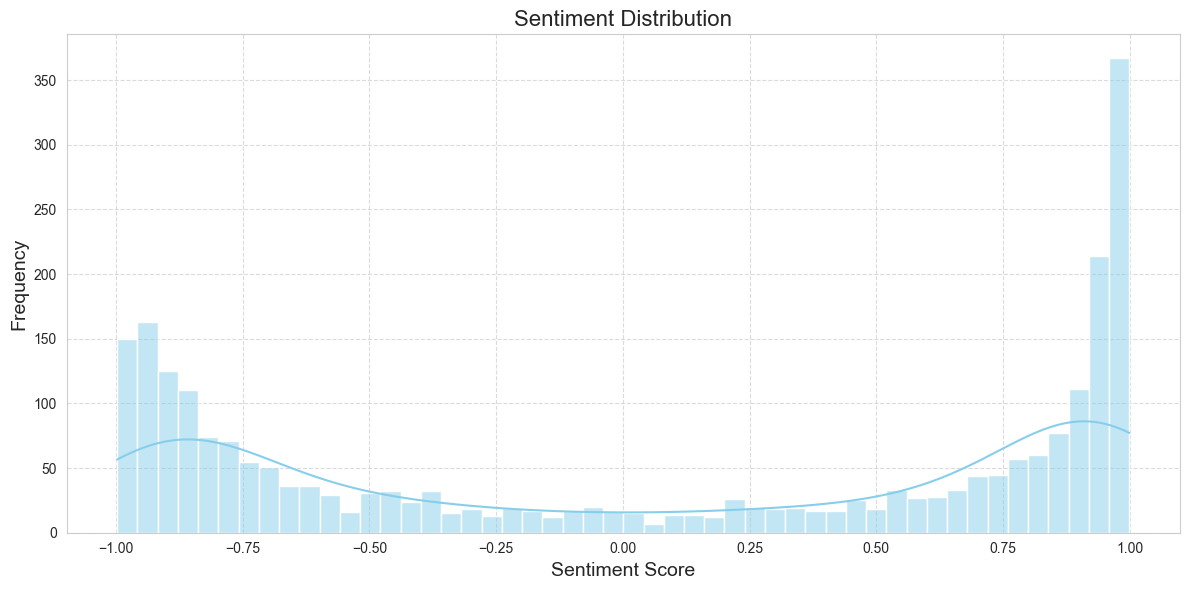

In [28]:
# distribution of sentiment
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(airline_df['Sentiment'], bins=50, kde=True, color='skyblue')
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

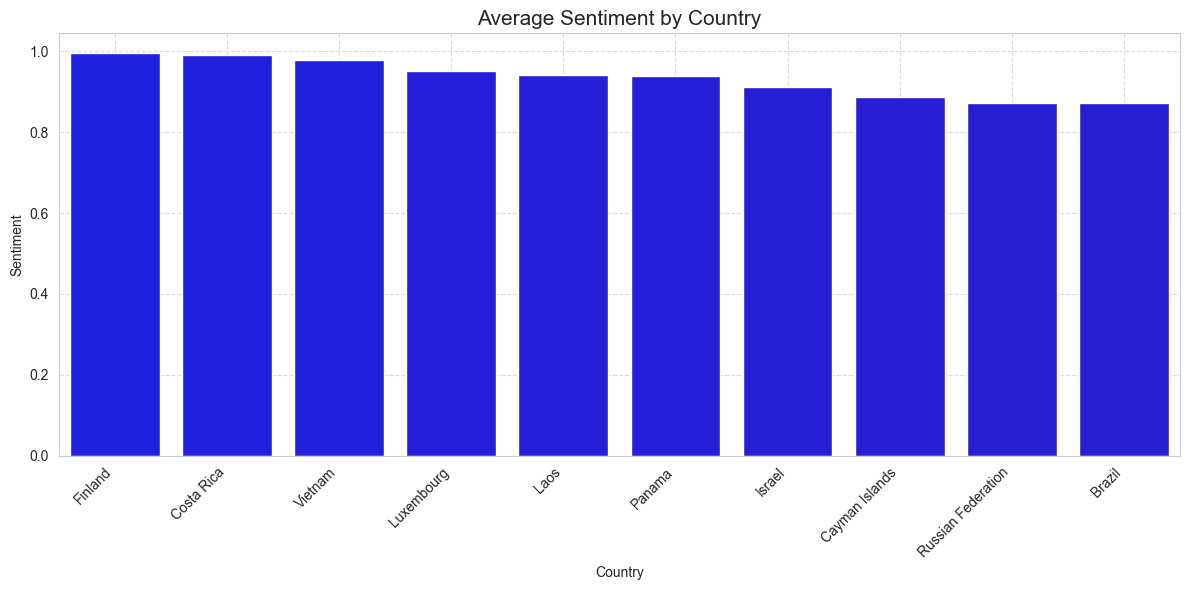

In [31]:
# visualize average sentiment by country
country_sentiment = airline_df.groupby('Country')['Sentiment'].mean().sort_values(ascending=False)
country_sentiment = country_sentiment[country_sentiment.index != 'None']
country_sentiment = country_sentiment[country_sentiment.index != 'N/A']
country_sentiment = country_sentiment[country_sentiment.index != '']
country_sentiment = country_sentiment.head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
cmap = LinearSegmentedColormap.from_list('red_blue', ['red', 'blue'])
norm = Normalize(vmin=-1, vmax=1)
sns.barplot(x=country_sentiment.index, y=country_sentiment.values, palette=[cmap(norm(val)) for val in country_sentiment.values])
plt.title("Average Sentiment by Country", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Sentiment")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


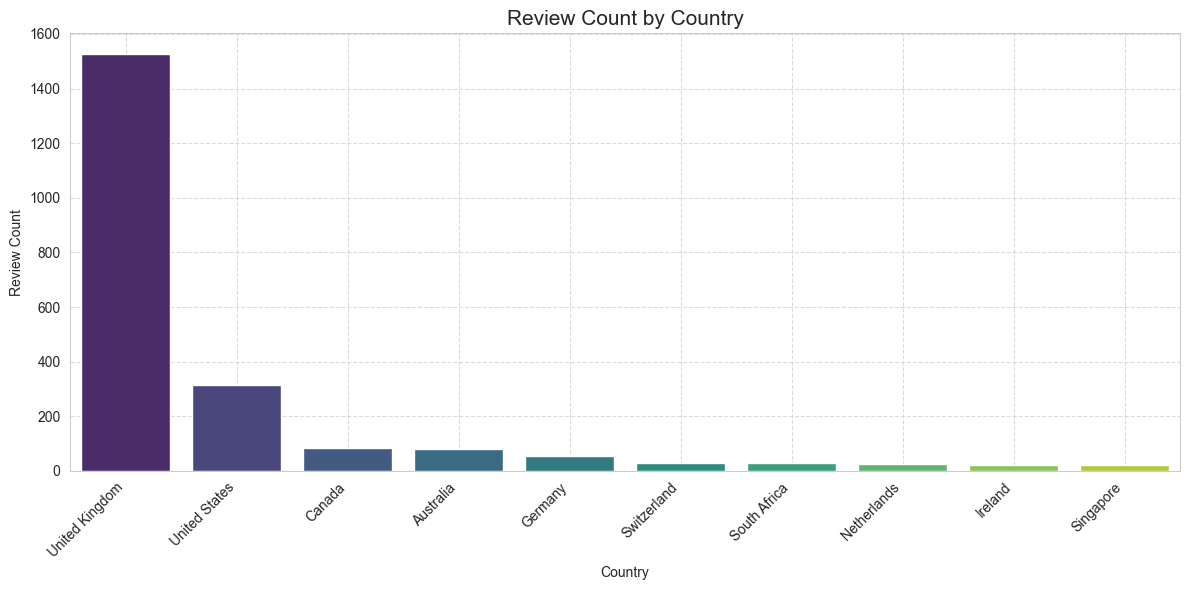

In [32]:
# visualize count of reviews by country
country_counts = airline_df['Country'].value_counts().head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title("Review Count by Country", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Review Count")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

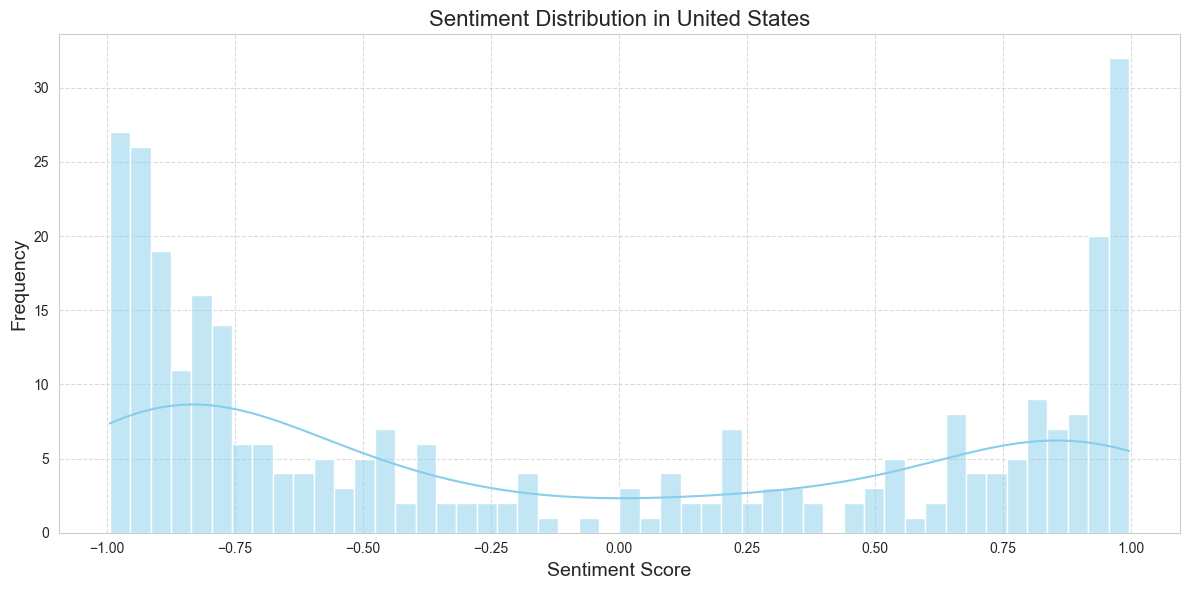

In [33]:
# visualize sentiment in united states
us_reviews = airline_df[airline_df['Country'] == 'United States']
us_reviews = us_reviews[us_reviews['Sentiment'] != 0]

plt.figure(figsize=(12, 6))
sns.histplot(us_reviews['Sentiment'], bins=50, kde=True, color='skyblue')
plt.title("Sentiment Distribution in United States", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



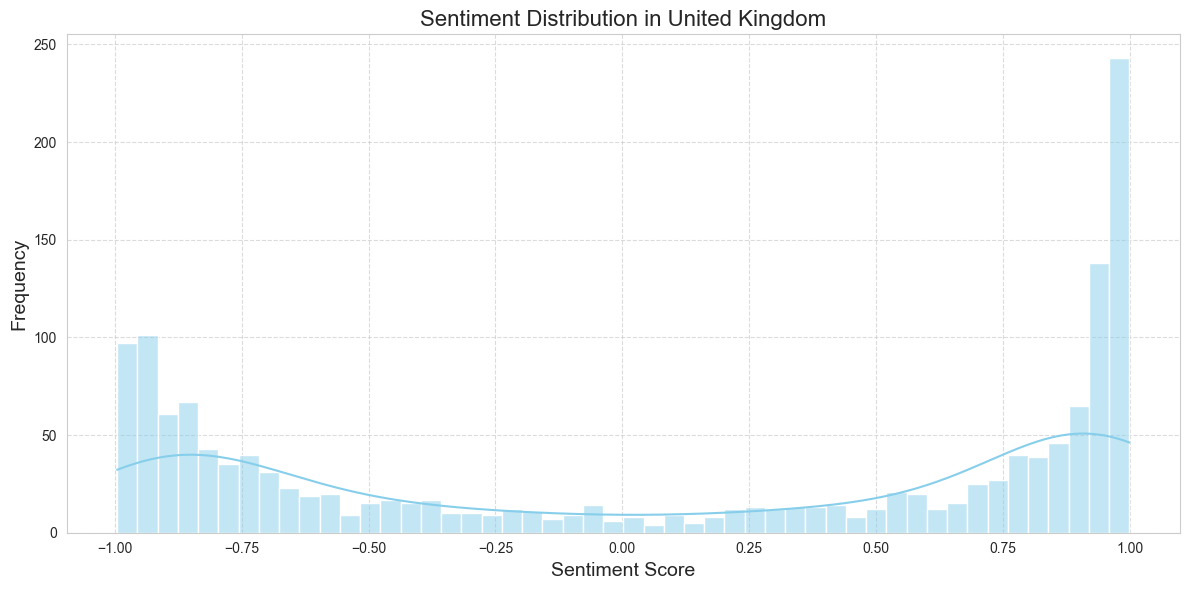

In [34]:
# sentiment distribution in united kingdom
uk_reviews = airline_df[airline_df['Country'] == 'United Kingdom']
uk_reviews = uk_reviews[uk_reviews['Sentiment'] != 0]

plt.figure(figsize=(12, 6))
sns.histplot(uk_reviews['Sentiment'], bins=50, kde=True, color='skyblue')
plt.title("Sentiment Distribution in United Kingdom", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


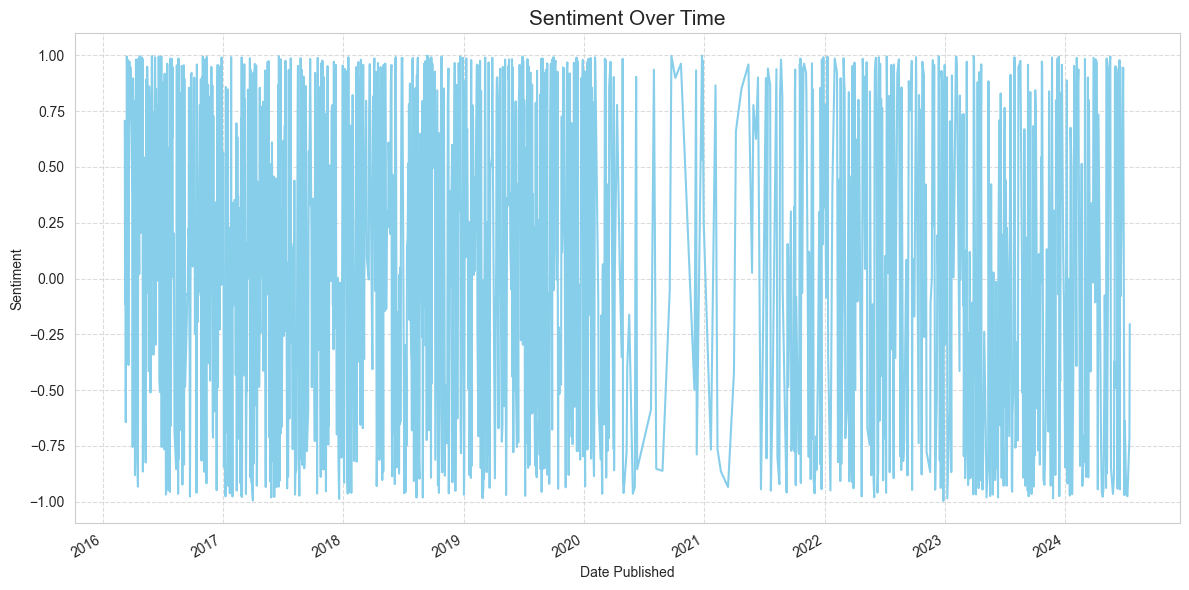

In [35]:
# visualize sentiment over time
time_sentiment = airline_df.groupby('Date Published')['Sentiment'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
time_sentiment.plot(color='skyblue')
plt.title("Sentiment Over Time", fontsize=15)
plt.xlabel("Date Published")
plt.ylabel("Sentiment")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
# count positive reivews from the US
print(f"Positive reviews from the US: {us_reviews[us_reviews['Sentiment'] > 0].shape[0]}")
print(f"Negative reviews from the US: {us_reviews[us_reviews['Sentiment'] < 0].shape[0]}")
print(f"Positive reviews from the UK: {uk_reviews[uk_reviews['Sentiment'] > 0].shape[0]}")
print(f"Negative reviews from the UK: {uk_reviews[uk_reviews['Sentiment'] < 0].shape[0]}")


Positive reviews from the US: 139
Negative reviews from the US: 175
Positive reviews from the UK: 822
Negative reviews from the UK: 698
